# Regression Week 2: Multiple Linear Regression Assignment 1

Predicting House Prices (Multiple Variables)

In this notebook you will use data on house sales in King County to predict prices using multiple regression. The first assignment will be about exploring multiple regression in particular exploring the impact of adding features to a regression and measuring error. In the second assignment you will implement a gradient descent algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Part 0 - Load the data

In [2]:
dtype_dict = {
    'bathrooms':float, 
    'waterfront':int, 
    'sqft_above':int, 
    'sqft_living15':float, 
    'grade':int, 
    'yr_renovated':int, 
    'price':float, 
    'bedrooms':float, 
    'zipcode':str,
    'long':float,
    'sqft_lot15':float, 
    'sqft_living':float, 
    'floors':str,
    'condition':int,
    'lat':float,
    'date':str,
    'sqft_basement':int, 
    'yr_built':int,
    'id':str,
    'sqft_lot':int,
    'view':int
}

train_data = pd.read_csv('../kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('../kc_house_test_data.csv', dtype=dtype_dict)

Although we often think of multiple regression as including multiple different features (e.g. # of bedrooms, square feet, and # of bathrooms) but we can also consider transformations of existing variables e.g. the log of the square feet or even "interaction" variables such as the product of bedrooms and bathrooms. Add 4 new variables in both your train_data and test_data.

- ‘bedrooms_squared’ = ‘bedrooms’*‘bedrooms’
- ‘bed_bath_rooms’ = ‘bedrooms’*‘bathrooms’
- ‘log_sqft_living’ = log(‘sqft_living’)
- ‘lat_plus_long’ = ‘lat’ + ‘long’

Before we continue let’s explain these new variables:

Squaring bedrooms will increase the separation between not many bedrooms (e.g. 1) and lots of bedrooms (e.g. 4) since 1^2 = 1 but 4^2 = 16. Consequently this variable will mostly affect houses with many bedrooms.
Bedrooms times bathrooms is what's called an "interaction" variable. It is large when both of them are large.
Taking the log of square feet has the effect of bringing large values closer together and spreading out small values.
Adding latitude to longitude is non-sensical but we will do it anyway (you'll see why)

### Part 1 - Visualize it

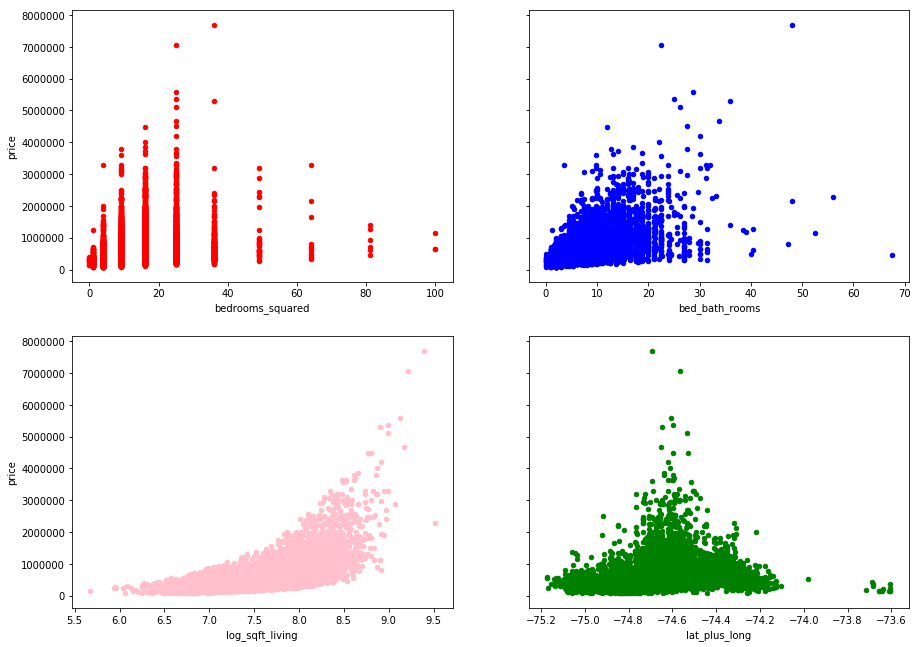

In [3]:
for dataset in [train_data, test_data]:
    dataset['bedrooms_squared'] = dataset['bedrooms'] * dataset['bedrooms']
    dataset['bed_bath_rooms'] = dataset['bedrooms'] * dataset['bathrooms']
    dataset['log_sqft_living'] = np.log(dataset['sqft_living'])
    dataset['lat_plus_long'] = dataset['lat'] + dataset['long']

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15,11),sharey=True)

train_data.plot(ax=ax[0,0], kind='scatter', x='bedrooms_squared', y='price', color='red')
train_data.plot(ax=ax[0,1], kind='scatter', x='bed_bath_rooms', y='price', color='blue')
train_data.plot(ax=ax[1,0], kind='scatter', x='log_sqft_living', y='price', color='pink')
train_data.plot(ax=ax[1,1], kind='scatter', x='lat_plus_long', y='price', color='green')

plt.show()

### Part 2

What are the mean (arithmetic average) values of your 4 new variables on TEST data? (round to 2 digits)

In [4]:
means = test_data.describe().loc['mean', ['bedrooms_squared', 'bed_bath_rooms', 'log_sqft_living', 'lat_plus_long']]
np.round(means,2)

bedrooms_squared    12.45
bed_bath_rooms       7.50
log_sqft_living      7.55
lat_plus_long      -74.65
Name: mean, dtype: float64

### Part 3 - perform multiple regression 

Use graphlab.linear_regression.create (or any other regression library/function) to estimate the regression coefficients/weights for predicting ‘price’ for the following three models:(In all 3 models include an intercept -- most software does this by default).

- Model 1: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’, and ‘long’
- Model 2: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’,‘long’, and ‘bed_bath_rooms’
- Model 3: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’,‘long’, ‘bed_bath_rooms’, ‘bedrooms_squared’, ‘log_sqft_living’, and ‘lat_plus_long’

You’ll note that the three models here are “nested” in that all of the features of the Model 1 are in Model 2 and all of the features of Model 2 are in Model 3.

If you use graphlab.linear_regression.create() to estimate these models please ensure that you set validation_set = None. This way you will get the same answer every time you run the code.

Learn all three models on the TRAINING data set. Save your model results for quiz questions later.

In [5]:
x = train_data
y = np.array(train_data['price'])

linear_fit = lambda H,y: np.dot(np.linalg.pinv(np.dot(H,H.T)), np.dot(H,y))

model1_feature_labels = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
model2_feature_labels = model1_feature_labels + ['bed_bath_rooms']
model3_feature_labels = model2_feature_labels + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']


H1 = np.array([np.ones(len(x))] + [x[label] for label in model1_feature_labels])
H2 = np.array([np.ones(len(x))] + [x[label] for label in model2_feature_labels])
H3 = np.array([np.ones(len(x))] + [x[label] for label in model3_feature_labels])

w = [linear_fit(H, y) for H in [H1, H2, H3]]

train_data['model_1'] = pd.Series(np.round(np.dot(H1.T, w[0])))
train_data['model_2'] = pd.Series(np.round(np.dot(H2.T, w[1])))
train_data['model_3'] = pd.Series(np.round(np.dot(H3.T, w[2])))
train_data[['price', 'model_1', 'model_2', 'model_3']]

pd.DataFrame(w, index=['model 1', 'model 2', 'model 3'], columns=['intercept'] + model3_feature_labels).T                       

,model 1,model 2,model 3
intercept,-6.907572e+07,-6.686798e+07,-6.203609e+07
sqft_living,3.122586e+02,3.066101e+02,5.294228e+02
bedrooms,-5.958653e+04,-1.134464e+05,3.451423e+04
bathrooms,1.570674e+04,-7.146130e+04,6.706078e+04
lat,6.586192e+05,6.548446e+05,5.353228e+05
long,-3.093743e+05,-2.942990e+05,-4.055135e+05
bed_bath_rooms,NaN,2.557965e+04,-8.570504e+03
bedrooms_squared,NaN,NaN,-6.788587e+03
log_sqft_living,NaN,NaN,-5.618315e+05
lat_plus_long,NaN,NaN,1.260977e+05


### Part 4 - RSS on Training data

Now using your three estimated models compute the RSS (Residual Sum of Squares) on the Training data.

In [6]:
rss = lambda y, H, w: np.dot((y - np.dot(H.T,w)).T,y - np.dot(H.T,w))


min((cost, idx + 1) for (idx, cost) in enumerate([rss(y, H, w) for H, w in zip([H1, H2, H3], w)]))

(903436455050477.12, 3)

### Part 5 - RSS on Test data
Now using your three estimated models compute the RSS on the Testing data

In [7]:
x = test_data
y = test_data['price']

H1 = np.array([np.ones(len(x))] + [x[label] for label in model1_feature_labels])
H2 = np.array([np.ones(len(x))] + [x[label] for label in model2_feature_labels])
H3 = np.array([np.ones(len(x))] + [x[label] for label in model3_feature_labels])

min((cost, idx + 1) for (idx, cost) in enumerate([rss(y, H, w) for H, w in zip([H1, H2, H3], w)]))

(223377462830408.16, 2)